In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [3]:
image_path = '../output_videos/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

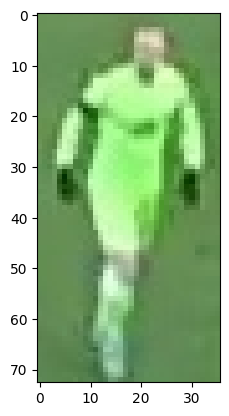

In [4]:
plt.imshow(image)

##

### Przyciecie zdjecia żeby uzyskać zdjęcie od pasa w góre

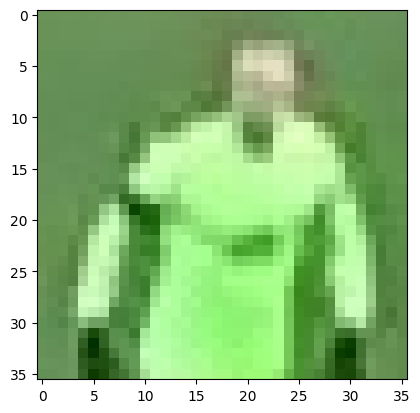

In [8]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)


### Podzielenie zdjęcia na 2 klastry


In [12]:
# Zmiana zdjecia na 2d array
image_2d = top_half_image.reshape(-1, 3)

# Zastosowanie Kmeans dla 2 klastrów
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

In [13]:
labels = kmeans.labels_

# Przywrócenie oryginalnego shape'a
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

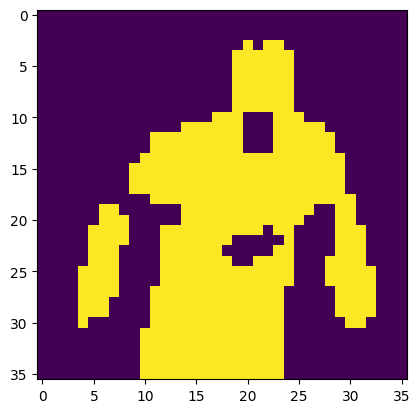

In [14]:
plt.imshow(clustered_image)

In [19]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
non_player_cluster

np.int32(0)

In [17]:
player_cluster = abs(non_player_cluster - 1)
player_cluster

np.int32(1)

In [20]:
kmeans.cluster_centers_[player_cluster]

array([172.98125   , 237.9375    , 147.93541667])